In [35]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

from dtreeviz.trees import dtreeviz

from os.path import isfile

import pickle

import time

import matplotlib.pyplot as plt

import seaborn as sns

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
def train_decision_tree(file_name: str, X_train: pd.DataFrame, y_train: pd.DataFrame):
    file_path = './data/models/' + file_name + '.pkl'
    train_model = DecisionTreeClassifier(random_state=42)
    
    if isfile(file_path):
        with open(file_path, 'rb') as m_file:
            train_model = pickle.load(m_file)
    else:
        start_time = time.time()
        
        result = None
    
        params = [
            {
                'criterion': ['gini', 'entropy'], 
                'splitter': ['best', 'random'], 
                #'max_depth': np.concatenate(np.arange(1, 15, 1), None),
                #'min_samples_split': np.arange(2, 4, 1), 
                #'min_samples_leaf': np.arange(1, 3, 1), 
                #'min_weight_fraction_leaf': np.arange(0.0, 0.3, 0.1), 
                'max_features': ['auto', 'sqrt', 'log2', None], 
                'max_leaf_nodes': np.concatenate(np.arange(2, 3, 1), None),
                'min_samples_split': np.arange(2, 5, 1), 
                #'min_impurity_decrease': np.arange(0.0, 0.3, 0.1), 
                'class_weight': ['balanced', None],
                'ccp_alpha': np.arange(0.0, .01, 0.0001)
            }
        ]
    
        cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
        grid_search = GridSearchCV(estimator=train_model, param_grid=params, cv=cross_val, n_jobs=-1, scoring='roc_auc', error_score='raise', verbose=1)
    
        result = grid_search.fit(X_train, y_train)
    
        train_model = result.best_estimator_
    
        print(result.best_params_)
        print("Training took {:.2f}s.".format((time.time() - start_time)))
        
        with open(file_path, 'wb') as m_file:
            pickle.dump(train_model, m_file)
            
    return train_model

In [3]:
def train_random_forest(file_name: str, X_train: pd.DataFrame, y_train: pd.DataFrame):
    file_path = './data/models/' + file_name + '.pkl'
    train_model = RandomForestClassifier(random_state=42)
    
    if isfile(file_path):
        with open(file_path, 'rb') as m_file:
            train_model = pickle.load(m_file)
    else:
        start_time = time.time()
        
        result = None
    
        params = [
            {
                'n_estimators': np.arange(50, 150, 50),
                'criterion': ['gini', 'entropy'], 
                'max_depth': np.concatenate(np.arange(1, 15, 1), None),
                #'min_samples_split': np.arange(2, 4, 1), 
                #'min_samples_leaf': np.arange(1, 3, 1), 
                #'min_weight_fraction_leaf': np.arange(0.0, 0.3, 0.1), 
                'max_features': ['auto', 'sqrt', 'log2', None], 
                'max_leaf_nodes': np.concatenate(np.arange(2, 3, 1), None),
                'min_samples_split': np.arange(2, 5, 1), 
                #'min_impurity_decrease': np.arange(0.0, 0.3, 0.1), 
                'class_weight': ['balanced', None],
                #'ccp_alpha': np.arange(0.0, .01, 0.001)
            }
        ]
    
        cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
        grid_search = GridSearchCV(estimator=train_model, param_grid=params, cv=cross_val, n_jobs=-1, scoring='roc_auc', error_score='raise', verbose=1)
    
        result = grid_search.fit(X_train, y_train)
    
        train_model = result.best_estimator_
    
        print(result.best_params_)
        print("Training took {:.2f}s.".format((time.time() - start_time)))
        
        with open(file_path, 'wb') as m_file:
            pickle.dump(train_model, m_file)
            
    return train_model

In [4]:
def plot_roc(predict_proba: np.array, test: np.array, name: str, n_class: int, colors: list, labels: list, fig_size: tuple):
    fp, tp, thr = {}, {}, {}
    
    f, ax = plt.subplots(1, figsize=fig_size)
    plt.title(name)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for i in range(n_class):
        fp[i], tp[i], thr[i] = roc_curve(test, predict_proba[:,i], pos_label=i)
        plt.plot(fp[i], tp[i], linestyle='--',color=colors[i], label=labels[i])
    
    plt.show()

In [5]:
colors = {
    0: 'orange',
    1: 'green',
}

labels = {
    0: 'Healthy',
    1: 'Sick'
}

**Импорт данных.**

In [6]:
src_df = pd.read_csv(filepath_or_buffer='./data/pima-indians-diabetes.csv')

In [7]:
src_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [8]:
src_df.shape

(768, 9)

In [9]:
src_df.drop_duplicates(inplace=True)

In [10]:
src_df.shape

(768, 9)

In [11]:
src_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Выглядит всё неплохо. Дубликатов нет, отсутствующих значений нет. Но меня удивляют нулевые значения в Glucose, BloodPressure, SkinThikness, Insulin и BMI.

*17 беременностей?...*

Придется их заменить на NaN, поскольку нулевых значений там не может быть по определению.

In [12]:
src_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = src_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [13]:
src_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

Да, неприятно.

Теперь нужно разбираться с семантикой параметров. Очевидные пропущу.

BMI - <a href="https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0">Индекс массы тела.</a>

Diabetes pedigree function - наследственная склонность к диабету.

**Экспериментальная модель.**

Для начала попробую выбросить все отсутствующие значения и построить на базе этого датасета модель для оценки значимости предикторов.

In [14]:
exp_df = src_df.dropna(axis=0)

In [15]:
exp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Class,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [16]:
print("Classes balance:\nNo diabete:\t\t{} ({:.2f}%)\nDiabete present:\t{} ({:.2f}%)".format(
    exp_df['Class'].isin([0]).sum(), exp_df['Class'].isin([0]).sum()/(exp_df.shape[0]/100),
    exp_df['Class'].isin([1]).sum(), exp_df['Class'].isin([1]).sum()/(exp_df.shape[0]/100)
))

Classes balance:
No diabete:		262 (66.84%)
Diabete present:	130 (33.16%)


Не идеально, но работать можно.

In [17]:
X_e = exp_df.drop('Class', axis=1)
y_e = exp_df[['Class']]

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size=0.2, shuffle=True, random_state=42, stratify=y_e)

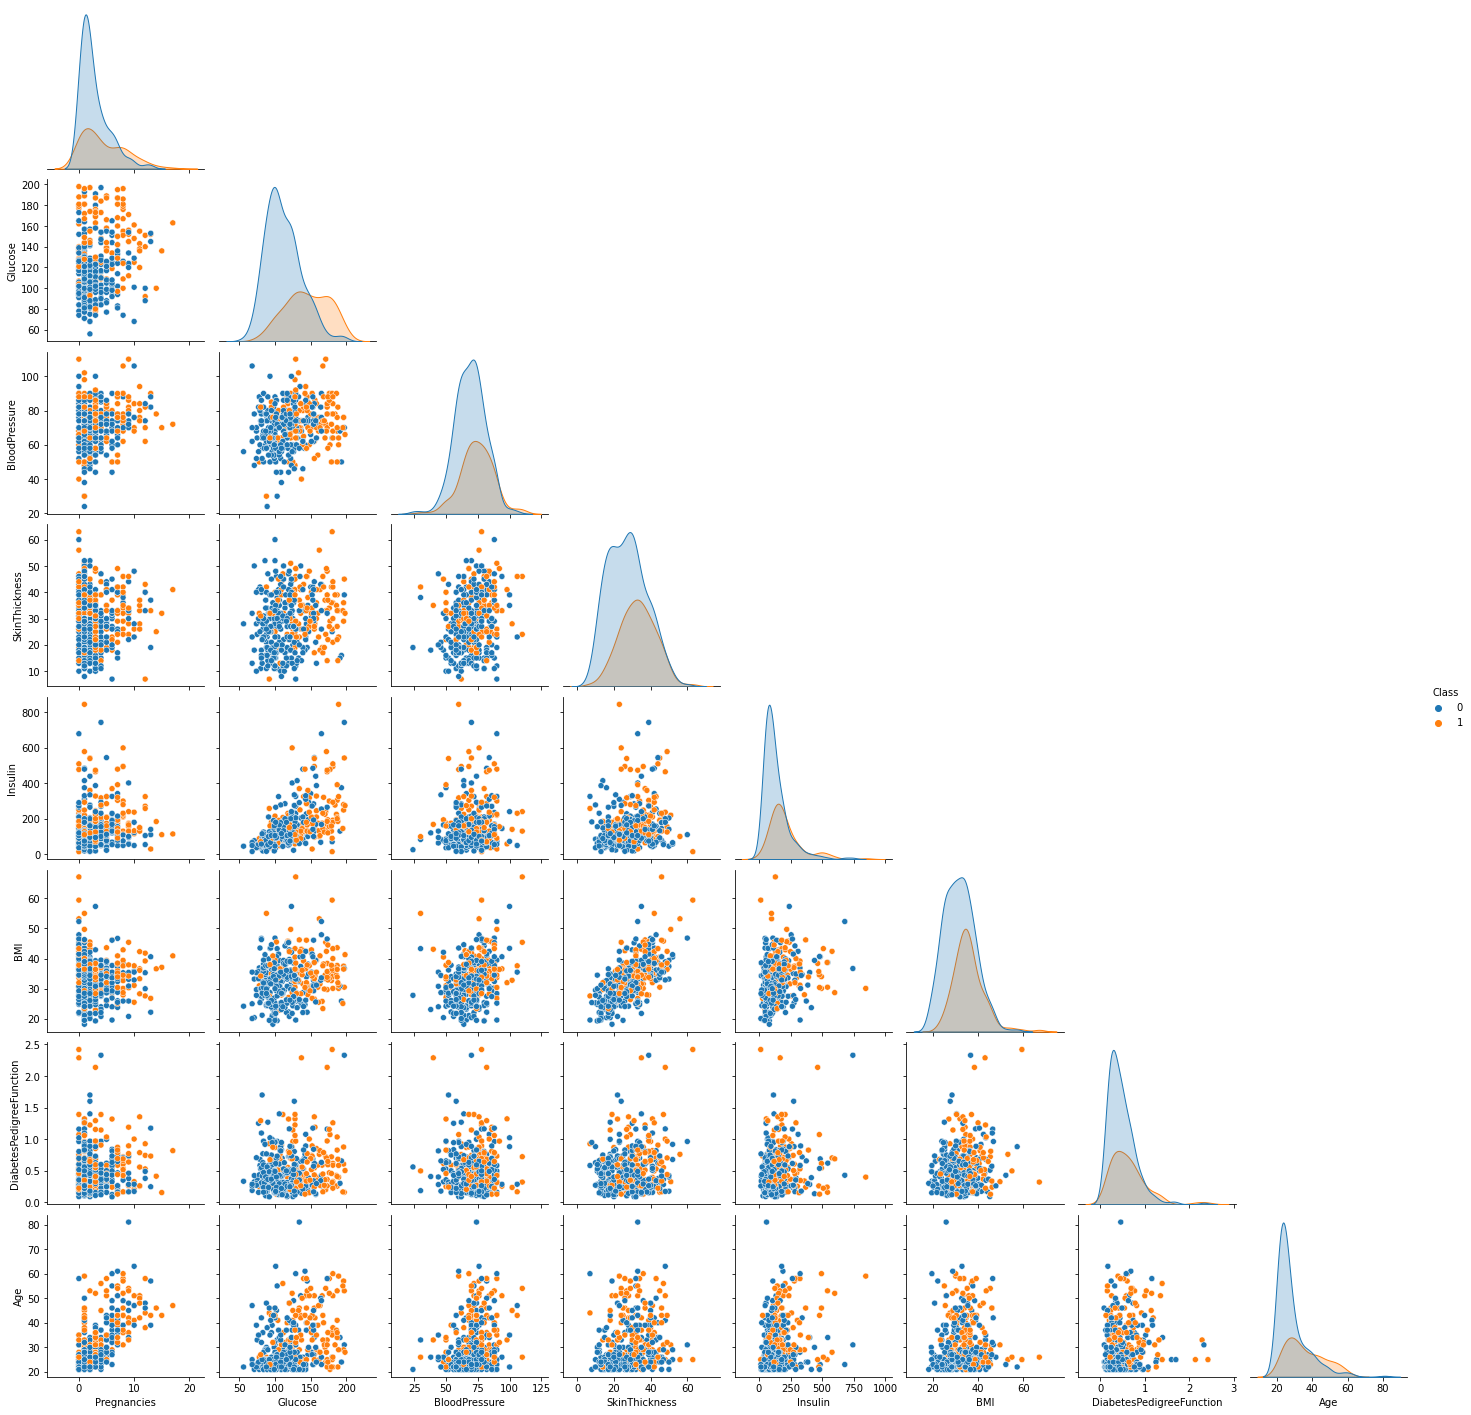

In [18]:
a = sns.pairplot(data=exp_df, hue='Class', corner=True)

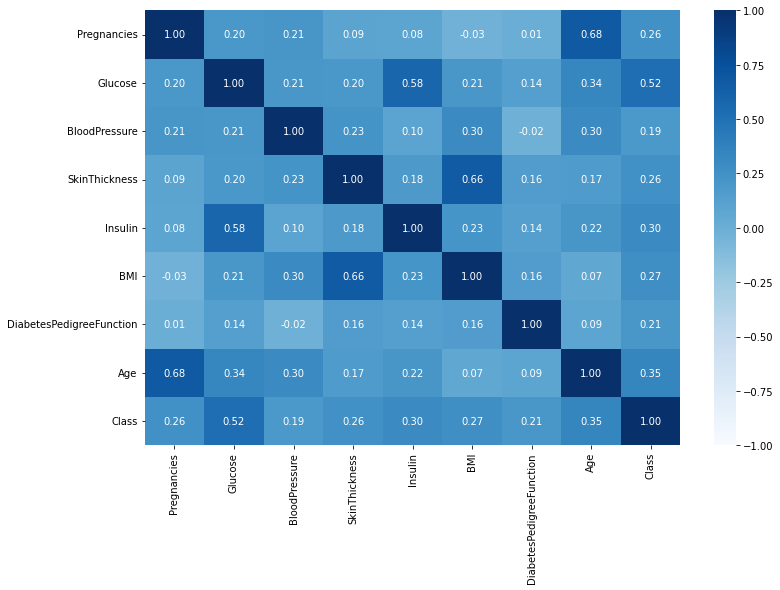

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
a = sns.heatmap(data=exp_df.corr(), annot=True, fmt=".2f", cmap='Blues', vmin=-1.0, vmax=1.0, center=0.0)

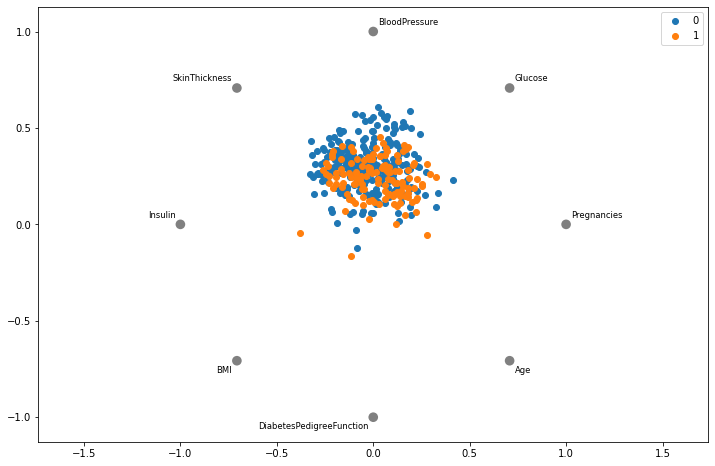

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
a = pd.plotting.radviz(frame=exp_df, class_column='Class', color=sns.color_palette())

Пока можно сказать, что инсулин, количестыво беременностей, наследственность, глюкоза и возраст ощутимо влияют на наличие диабета.

In [21]:
exp_model_dt = train_decision_tree('exp_model_dt', X_train_e, y_train_e)

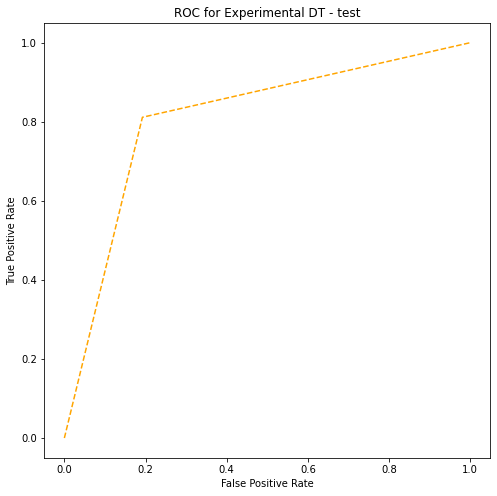

In [22]:
exp_model_dt_pred_test = exp_model_dt.predict_proba(X_test_e)
plot_roc(exp_model_dt_pred_test, y_test_e, 'ROC for Experimental DT - test', 1, colors, labels, (8, 8))

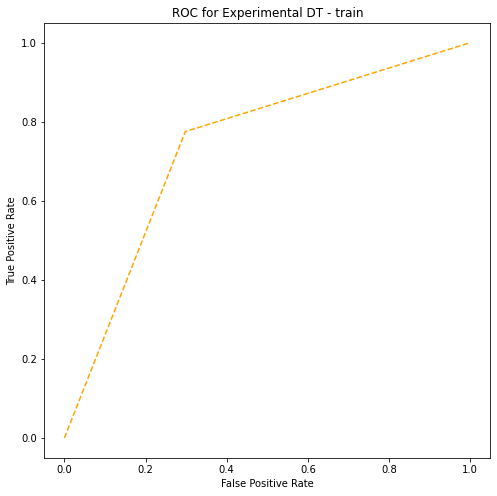

In [23]:
exp_model_dt_pred_train = exp_model_dt.predict_proba(X_train_e)
plot_roc(exp_model_dt_pred_train, y_train_e, 'ROC for Experimental DT - train', 1, colors, labels, (8, 8))

In [24]:
print(roc_auc_score(y_test_e, exp_model_dt_pred_test[:, 1]))
print(roc_auc_score(y_train_e, exp_model_dt_pred_train[:, 1]))

0.8095065312046444
0.7385213470739787


Переобучения, похоже, нет.

In [25]:
exp_perm = PermutationImportance(exp_model_dt, random_state=42, scoring='roc_auc', n_iter=100).fit(X_test_e, y_test_e)
eli5.explain_weights(exp_perm, feature_names=X_e.columns.values)

Weight,Feature
0.3113 ± 0.1138,Glucose
0 ± 0.0000,Age
0 ± 0.0000,DiabetesPedigreeFunction
0 ± 0.0000,BMI
0 ± 0.0000,Insulin
0 ± 0.0000,SkinThickness
0 ± 0.0000,BloodPressure
0 ± 0.0000,Pregnancies


Вот это номер... Получается, что модель предсказывает диабет по глюозе?

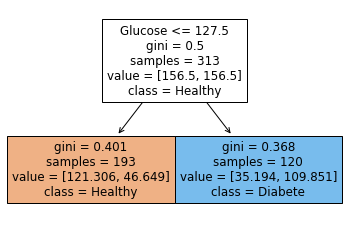

In [26]:
a = plot_tree(exp_model_dt, feature_names = X_e.columns, class_names=['Healthy', 'Diabete'], filled=True)

Так и есть. В жизни, в принципе, это тоже основной показатель.

Но точность так себе. 

**Ансамбль - Random Forest.**

In [27]:
model_rf = train_random_forest('model_rf', X_train_e, y_train_e.to_numpy().flatten())

Fitting 30 folds for each of 1344 candidates, totalling 40320 fits
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training took 1062.99s.


In [48]:
model_rf_pred_train = model_rf.predict_proba(X_train_e)
model_rf_pred_test = model_rf.predict_proba(X_test_e)

print(roc_auc_score(y_test_e, model_rf_pred_test[:, 1]))
print(roc_auc_score(y_train_e, model_rf_pred_train[:, 1]))

0.9005805515239478
0.8643494663231505


Вот этот результат мне больше нравится.

In [51]:
len(model_rf.estimators_)

100

In [54]:
rf_perm = PermutationImportance(model_rf, random_state=42, scoring='roc_auc', n_iter=100).fit(X_test_e, y_test_e)
eli5.show_weights(rf_perm, feature_names=X_e.columns.values)

Weight,Feature
0.1790 ± 0.0960,Glucose
0.0199 ± 0.0303,Insulin
0.0173 ± 0.0278,Age
0.0171 ± 0.0158,BMI
0.0114 ± 0.0135,Pregnancies
0.0080 ± 0.0111,SkinThickness
0.0079 ± 0.0098,DiabetesPedigreeFunction
0.0031 ± 0.0043,BloodPressure


Для случайного леса важна не только глюкоза, но она по прежнему самый значимый предиктор. 